In [1]:
# Statsmodels time series analysis

In [2]:
# Statsmodels, Dates and datetime

In [6]:
# !pip install statsmodels

In [7]:
import statsmodels.api as sm

In [8]:
sm.tsa.datetools.dates_from_range('2010', length=12)

[datetime.datetime(2010, 12, 31, 0, 0),
 datetime.datetime(2011, 12, 31, 0, 0),
 datetime.datetime(2012, 12, 31, 0, 0),
 datetime.datetime(2013, 12, 31, 0, 0),
 datetime.datetime(2014, 12, 31, 0, 0),
 datetime.datetime(2015, 12, 31, 0, 0),
 datetime.datetime(2016, 12, 31, 0, 0),
 datetime.datetime(2017, 12, 31, 0, 0),
 datetime.datetime(2018, 12, 31, 0, 0),
 datetime.datetime(2019, 12, 31, 0, 0),
 datetime.datetime(2020, 12, 31, 0, 0),
 datetime.datetime(2021, 12, 31, 0, 0)]

In [9]:
sm.tsa.datetools.dates_from_range('2010m1', length=120)

[datetime.datetime(2010, 1, 31, 0, 0),
 datetime.datetime(2010, 2, 28, 0, 0),
 datetime.datetime(2010, 3, 31, 0, 0),
 datetime.datetime(2010, 4, 30, 0, 0),
 datetime.datetime(2010, 5, 31, 0, 0),
 datetime.datetime(2010, 6, 30, 0, 0),
 datetime.datetime(2010, 7, 31, 0, 0),
 datetime.datetime(2010, 8, 31, 0, 0),
 datetime.datetime(2010, 9, 30, 0, 0),
 datetime.datetime(2010, 10, 31, 0, 0),
 datetime.datetime(2010, 11, 30, 0, 0),
 datetime.datetime(2010, 12, 31, 0, 0),
 datetime.datetime(2011, 1, 31, 0, 0),
 datetime.datetime(2011, 2, 28, 0, 0),
 datetime.datetime(2011, 3, 31, 0, 0),
 datetime.datetime(2011, 4, 30, 0, 0),
 datetime.datetime(2011, 5, 31, 0, 0),
 datetime.datetime(2011, 6, 30, 0, 0),
 datetime.datetime(2011, 7, 31, 0, 0),
 datetime.datetime(2011, 8, 31, 0, 0),
 datetime.datetime(2011, 9, 30, 0, 0),
 datetime.datetime(2011, 10, 31, 0, 0),
 datetime.datetime(2011, 11, 30, 0, 0),
 datetime.datetime(2011, 12, 31, 0, 0),
 datetime.datetime(2012, 1, 31, 0, 0),
 datetime.datetime(

In [10]:
# Q-Q plots

In [11]:
from statsmodels.graphics.api import qqplot
import numpy as np

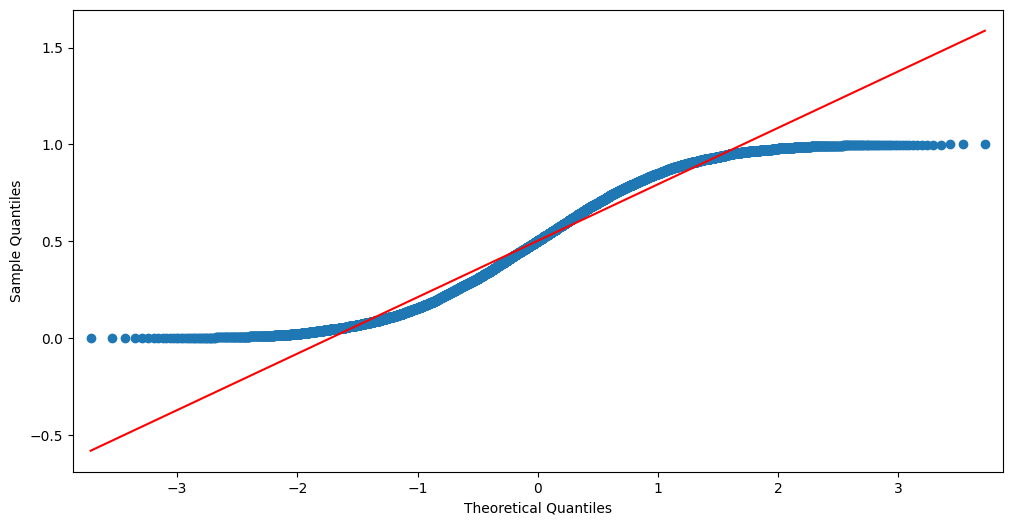

In [12]:
fig = qqplot(np.random.uniform(size=10000), line='s')
fig.set_size_inches(12, 6)

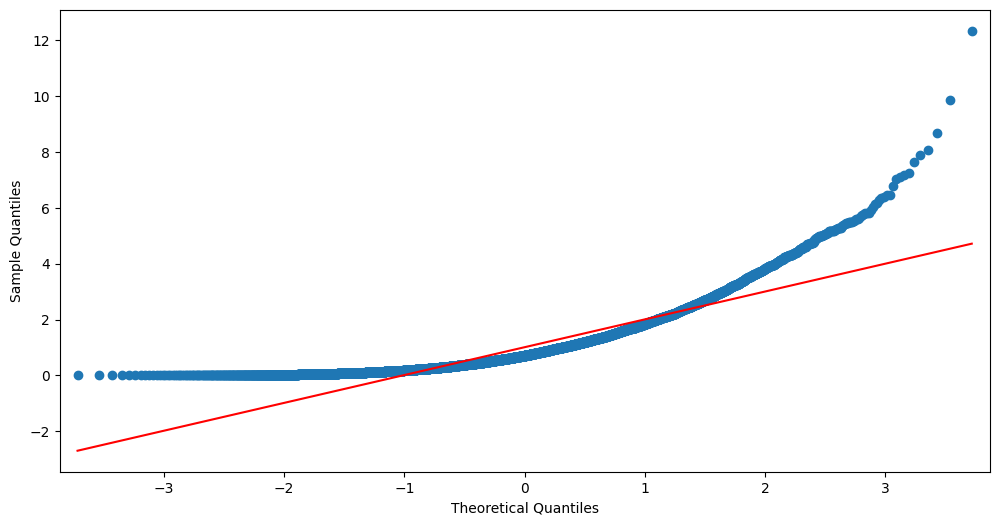

In [13]:
fig = qqplot(np.random.exponential(size=10000), line='s')
fig.set_size_inches(12, 6)

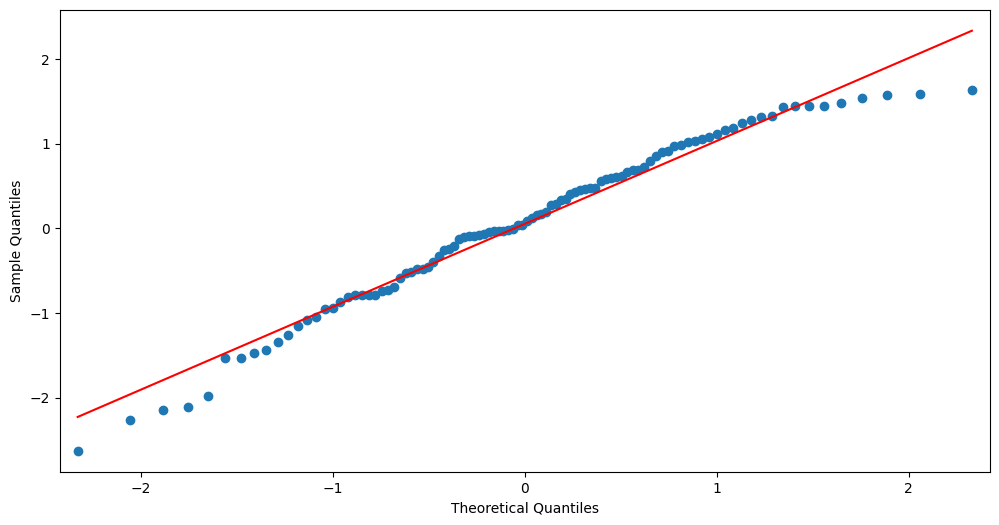

In [14]:
fig = qqplot(np.random.normal(size=100), line='s')
fig.set_size_inches(12, 6)

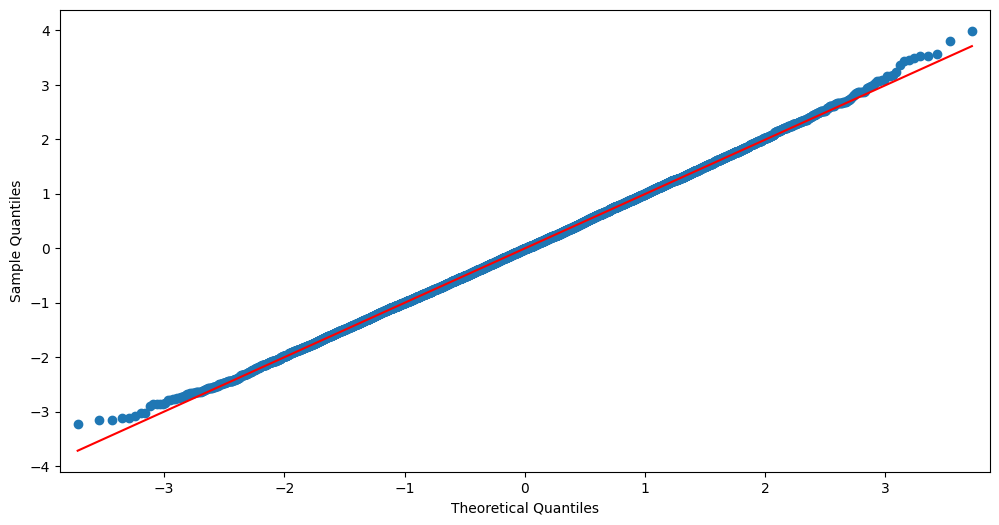

In [15]:
fig = qqplot(np.random.normal(size=10000), line='s')
fig.set_size_inches(12, 6)

In [16]:
# Trends and Cycles

In [17]:
import pandas as pd
n_obs = 12 * 20
linear_trend = np.linspace(100, 200, num=n_obs)
cycle = np.sin(linear_trend) * 10
error_noise = np.random.randn(n_obs)
dataset = pd.DataFrame(linear_trend + cycle + error_noise,
                       index=sm.tsa.datetools.dates_from_range('2000m1', length=n_obs),
                      columns=['Price'])
dataset

,Price
2000-01-31,95.021113
2000-02-29,98.912804
2000-03-31,104.269265
2000-04-30,107.882968
2000-05-31,112.274693
...,...
2019-08-31,195.156669
2019-09-30,190.621416
2019-10-31,190.033570
2019-11-30,189.521793


<Axes: >

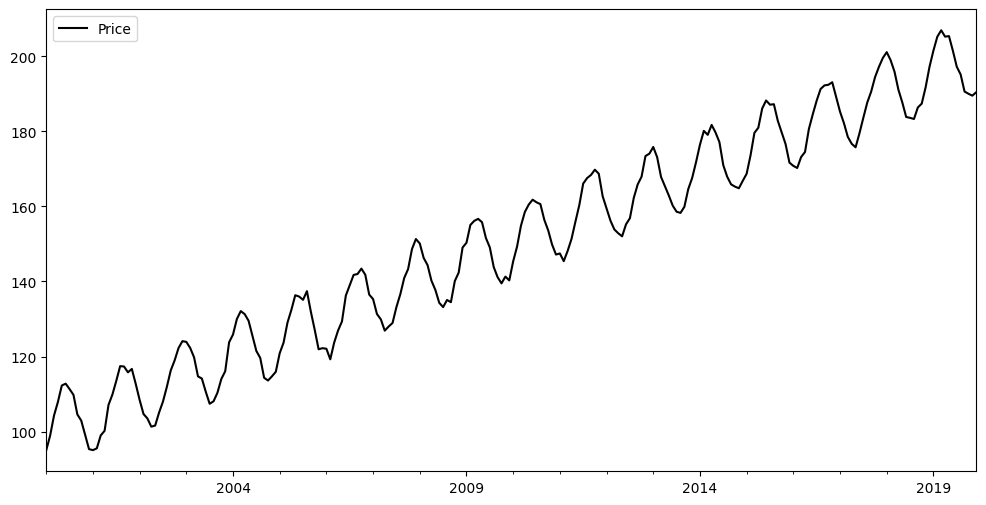

In [18]:
import matplotlib.pyplot as plt
dataset.plot(figsize=(12, 6), color='black')

In [19]:
hp_cycle, hp_trend = sm.tsa.filters.hpfilter(dataset['Price'], lamb=129600)
decomp = dataset[['Price']]
decomp['HP_Cycle'] = hp_cycle
decomp['HP_Trend'] = hp_trend
decomp

,Price,HP_Cycle,HP_Trend
2000-01-31,95.021113,-6.085275,101.106388
2000-02-29,98.912804,-2.571515,101.484319
2000-03-31,104.269265,2.407061,101.862203
2000-04-30,107.882968,5.642994,102.239974
2000-05-31,112.274693,9.657111,102.617582
...,...,...,...
2019-08-31,195.156669,-2.077123,197.233792
2019-09-30,190.621416,-6.977193,197.598609
2019-10-31,190.033570,-7.929468,197.963038
2019-11-30,189.521793,-8.805479,198.327272


In [20]:
uc = sm.tsa.UnobservedComponents(dataset['Price'], level='lltrend', cycle=True, stochastic_cycle=True)
res_uc = uc.fit(method='powell', disp=True)
res_uc.summary()

Optimization terminated successfully.
         Current function value: 1.960368
         Iterations: 6
         Function evaluations: 412


/home/hung/.local/share/virtualenvs/data-analysis-3SQuOzRT/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Unobserved Components Results                         
==============================================================================
Dep. Variable:                  Price   No. Observations:                  240
Model:             local linear trend   Log Likelihood                -470.488
                   + stochastic cycle   AIC                            950.977
Date:                Tue, 17 Dec 2024   BIC                            968.296
Time:                        12:44:32   HQIC                           957.958
Sample:                    01-31-2000                                         
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     0.3832      0.166      2.312      0.021       0.058       0.708
sigma2.level      3.464e-18      0.071   4.87e-17      1.000      -0.140       0.140
sigma2.trend      3.114e-21   1.46e-05   2.13e-16      1.000   -2.87e-05    2.87e-05
sigma2.cycle         1.4783      0.443      3.334      0.001       0.609       2.347
frequency.cycle      0.3491      0.012     29.654      0.000       0.326       0.372
===================================================================================
Ljung-Box (L1) (Q):                   0.69   Jarque-Bera (JB):                 2.24
Prob(Q):                              0.41   Prob(JB):                         0.33
Heteroskedasticity (H):               0.73   Skew:                            -0.03
Prob(H) (two-sided):                  0.16   Kurtosis:                         2.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
decomp['UC_Cycle'] = res_uc.cycle.smoothed
decomp['UC_Trend'] = res_uc.level.smoothed
decomp['UC_Error'] = res_uc.resid
decomp

,Price,HP_Cycle,HP_Trend,UC_Cycle,UC_Trend,UC_Error
2000-01-31,95.021113,-6.085275,101.106388,-4.924310,99.967929,95.021113
2000-02-29,98.912804,-2.571515,101.484319,-1.252284,100.387014,6.756946
2000-03-31,104.269265,2.407061,101.862203,3.355077,100.806099,6.914222
2000-04-30,107.882968,5.642994,102.239974,6.927400,101.225184,-4.275782
2000-05-31,112.274693,9.657111,102.617582,10.311334,101.644269,5.421869
...,...,...,...,...,...,...
2019-08-31,195.156669,-2.077123,197.233792,-3.664351,198.452894,0.723614
2019-09-30,190.621416,-6.977193,197.598609,-7.835836,198.871979,-1.975041
2019-10-31,190.033570,-7.929468,197.963038,-9.379992,199.291063,1.149572
2019-11-30,189.521793,-8.805479,198.327272,-10.185331,199.710148,0.221727


In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
s_dc = seasonal_decompose(dataset['Price'], model='additive')
decomp['SDC_Cycle'] = s_dc.seasonal
decomp['SDC_Trend'] = s_dc.trend
decomp['SDC_Error'] = s_dc.resid
decomp[118:122]

,Price,HP_Cycle,HP_Trend,UC_Cycle,UC_Trend,UC_Error,SDC_Cycle,SDC_Trend,SDC_Error
2009-11-30,141.302855,-8.396030,149.698884,-8.721329,149.419954,2.704497,0.260200,147.745308,-6.702654
2009-12-31,140.289679,-9.829513,150.119192,-8.923659,149.839039,-1.593152,0.043698,148.367684,-8.121703
2010-01-31,145.367652,-5.171880,150.539532,-5.119863,150.258124,3.194840,0.319693,149.294818,-4.246860
2010-02-28,149.299823,-1.659961,150.959784,-1.217612,150.677209,1.143059,-0.129611,150.493728,-1.064294


<Axes: title={'center': 'Trend components'}>

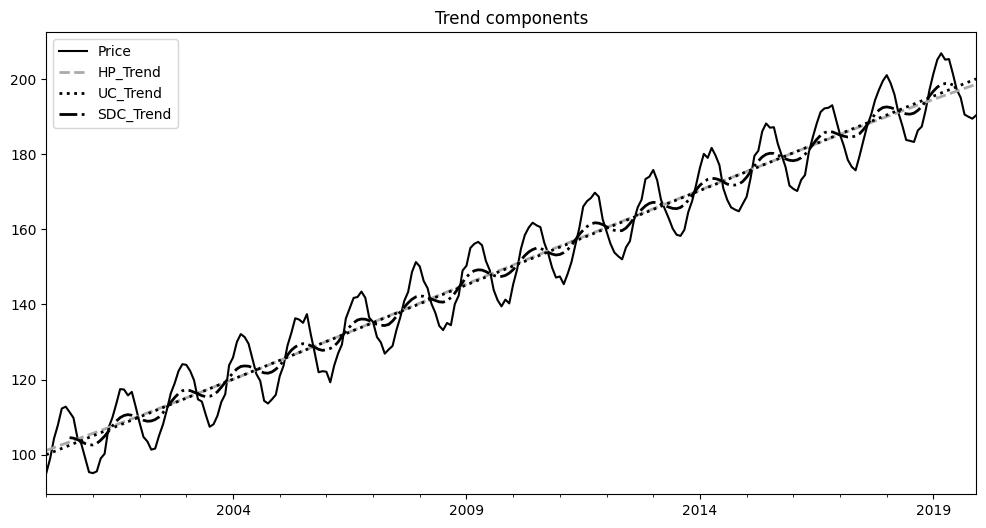

In [23]:
plt.title('Trend components')
decomp['Price'].plot(figsize=(12, 6), color='black', linestyle='-', legend='Price')
decomp['HP_Trend'].plot(figsize=(12, 6), color='darkgray', linestyle='--', lw=2, legend='HP_Trend')
decomp['UC_Trend'].plot(figsize=(12, 6), color='black', linestyle=':', lw=2, legend='UC_Trend')
decomp['SDC_Trend'].plot(figsize=(12, 6), color='black', linestyle='-.', lw=2, legend='SDC_Trend')

<Axes: title={'center': 'Cycle/Seasonal components'}>

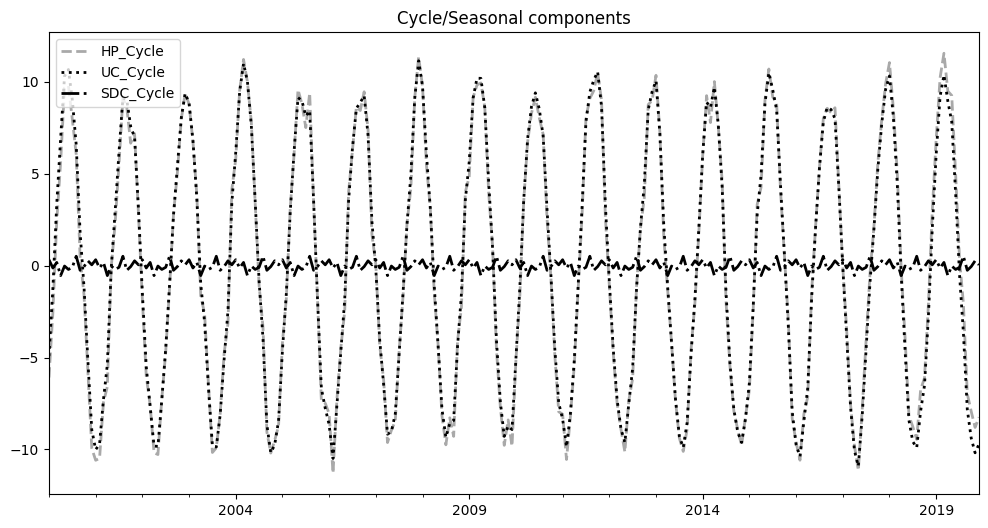

In [24]:
plt.title('Cycle/Seasonal components')
decomp['HP_Cycle'].plot(figsize=(12, 6), color='darkgray', linestyle='--', lw=2, legend='HP_Cycle')
decomp['UC_Cycle'].plot(figsize=(12, 6), color='black', linestyle=':', lw=2, legend='UC_Cycle')
decomp['SDC_Cycle'].plot(figsize=(12, 6), color='black', linestyle='-.', lw=2, legend='SDC_Cycle')

<Axes: title={'center': 'Error components'}>

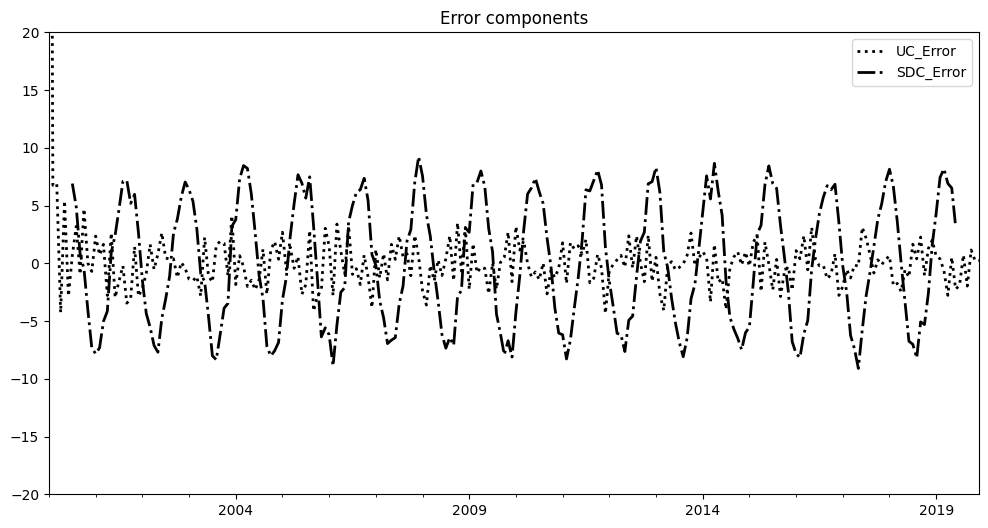

In [25]:
plt.title('Error components')
plt.ylim((-20, 20))
decomp['UC_Error'].plot(figsize=(12, 6), color='black', linestyle=':', lw=2, legend='UC_Error')
decomp['SDC_Error'].plot(figsize=(12, 6), color='black', linestyle='-.', lw=2, legend='SDC_Error')

In [26]:
# Stationarity

In [27]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(dataset['Price'])
print('Test Stat: {}\np value: {}\nLags: {}\nNum observations: {}'.format(result[0], result[1], result[2], result[3]))

Test Stat: -0.22737304399733385
p value: 0.9351791947314879
Lags: 14
Num observations: 225


In [28]:
price_diff = (dataset['Price'].shift(-1) - dataset['Price']).fillna(0)
price_diff

2000-01-31    3.891691
2000-02-29    5.356460
2000-03-31    3.613703
2000-04-30    4.391725
2000-05-31    0.499932
                ...   
2019-08-31   -4.535252
2019-09-30   -0.587846
2019-10-31   -0.511777
2019-11-30    0.917145
2019-12-31    0.000000
Name: Price, Length: 240, dtype: float64

In [29]:
result = adfuller(price_diff)
print('Test Stat: {}\np value: {}\nLags: {}\nNum observations: {}'.format(result[0], result[1], result[2], result[3]))

Test Stat: -9.534471681295985
p value: 2.8329601926340593e-16
Lags: 15
Num observations: 224


In [30]:
# ACF

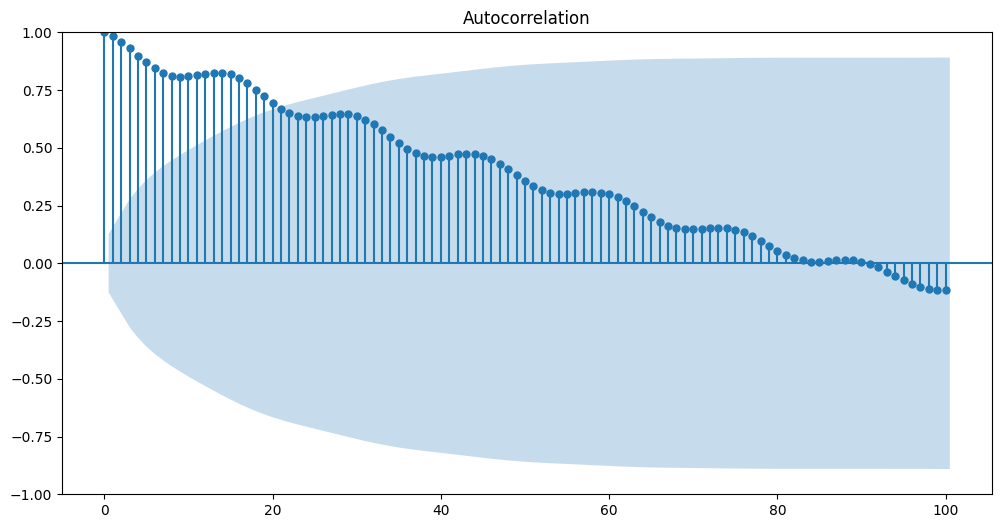

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plot_acf(dataset['Price'], lags=100)
fig.set_size_inches(12, 6)

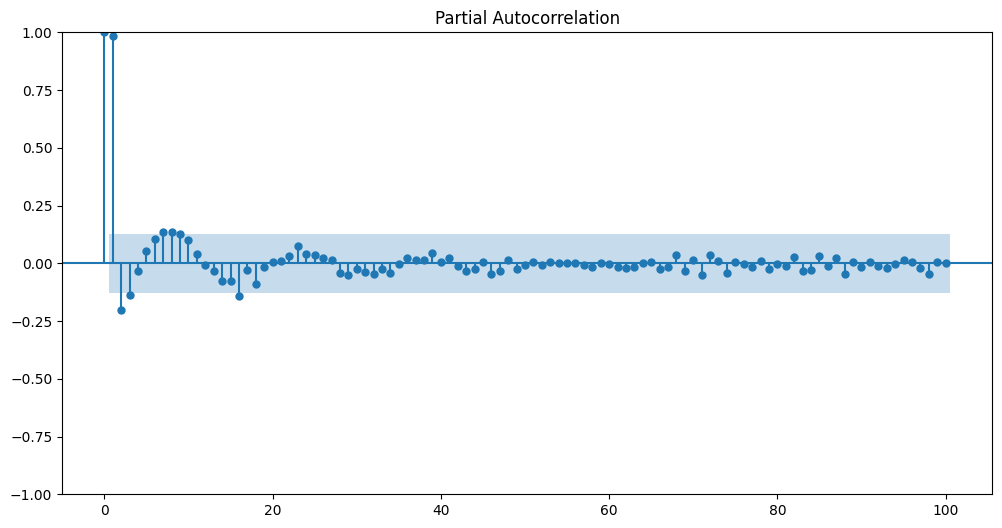

In [32]:
fig = plot_pacf(dataset['Price'], lags=100)
fig.set_size_inches(12, 6)

In [33]:
# ARIMA

In [34]:
from statsmodels.tsa.arima.model import ARIMA
arima = ARIMA(dataset['Price'], order=(36,1,2))
res_ar = arima.fit()
res_ar.summary()

/home/hung/.local/share/virtualenvs/data-analysis-3SQuOzRT/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/hung/.local/share/virtualenvs/data-analysis-3SQuOzRT/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/hung/.local/share/virtualenvs/data-analysis-3SQuOzRT/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/hung/.local/share/virtualenvs/data-analysis-3SQuOzRT/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('No

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  240
Model:                ARIMA(36, 1, 2)   Log Likelihood                -129.808
Date:                Tue, 17 Dec 2024   AIC                            337.616
Time:                        12:44:48   BIC                            473.198
Sample:                    01-31-2000   HQIC                           392.252
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1        -11.0432      6e-08  -1.84e+08      0.000     -11.043     -11.043
ar.L2        -60.4532   1.04e-08   -5.8e+09      0.000     -60.453     -60.453
ar.L3       -216.0481   2.32e-10  -9.31e+11      0.000    -216.048    -216.048
ar.L4       -556.5400        nan        nan        nan         nan         nan
ar.L5      -1067.3816   1.03e-10  -1.03e+13      0.000   -1067.382   -1067.382
ar.L6      -1483.2162   2.99e-10  -4.97e+12      0.000   -1483.216   -1483.216
ar.L7      -1233.0084   9.37e-11  -1.32e+13      0.000   -1233.008   -1233.008
ar.L8        307.7487   1.17e-10   2.64e+12      0.000     307.749     307.749
ar.L9       3235.7336    6.6e-11   4.91e+13      0.000    3235.734    3235.734
ar.L10      6560.2714   6.35e-11   1.03e+14      0.000    6560.271    6560.271
ar.L11      8256.0586   8.31e-12   9.94e+14      0.000    8256.059    8256.059
ar.L12      6261.7915   1.43e-11   4.39e+14      0.000    6261.792    6261.792
ar.L13        23.0273   8.98e-08   2.56e+08      0.000      23.027      23.027
ar.L14     -8490.7815   7.85e-15  -1.08e+18      0.000   -8490.782   -8490.782
ar.L15     -1.529e+04   6.43e-15  -2.38e+18      0.000   -1.53e+04   -1.53e+04
ar.L16     -1.645e+04   4.75e-15  -3.46e+18      0.000   -1.64e+04   -1.64e+04
ar.L17     -1.053e+04    5.2e-12  -2.03e+15      0.000   -1.05e+04   -1.05e+04
ar.L18       202.3121   3.61e-10    5.6e+11      0.000     202.312     202.312
ar.L19      1.084e+04   5.92e-15   1.83e+18      0.000    1.08e+04    1.08e+04
ar.L20      1.653e+04   1.97e-11   8.39e+14      0.000    1.65e+04    1.65e+04
ar.L21      1.513e+04   2.46e-11   6.15e+14      0.000    1.51e+04    1.51e+04
ar.L22      8193.8362   1.31e-11   6.25e+14      0.000    8193.836    8193.836
ar.L23      -295.2164   2.66e-10  -1.11e+12      0.000    -295.216    -295.216
ar.L24     -6399.0981   1.01e-13  -6.31e+16      0.000   -6399.098   -6399.098
ar.L25     -8241.3248   1.22e-11  -6.74e+14      0.000   -8241.325   -8241.325
ar.L26     -6453.0067   1.72e-11  -3.76e+14      0.000   -6453.007   -6453.007
ar.L27     -3117.2901   4.39e-11   -7.1e+13      0.000   -3117.290   -3117.290
ar.L28      -231.8381   4.66e-10  -4.97e+11      0.000    -231.838    -231.838
ar.L29      1256.4155   1.69e-10   7.42e+12      0.000    1256.416    1256.416
ar.L30      1473.1627   2.65e-09   5.55e+11      0.000    1473.163    1473.163
ar.L31      1047.8189   3.85e-11   2.72e+13      0.000    1047.819    1047.819
ar.L32       541.5360   3.37e-10   1.61e+12      0.000     541.536     541.536
ar.L33       208.5295   1.19e-09   1.75e+11      0.000     208.529     208.529
ar.L34        57.8751   1.11e-09    5.2e+10      0.000      57.875      57.875
ar.L35        10.4808   6.02e-08   1.74e+08      0.000      10.481      10.481
ar.L36         0.9400   4.28e-09    2.2e+08      0.000       0.940       0.940
ma.L1         -0.9730   4.79e-09  -2.03e+08      0.000      -0.973      -0.973
ma.L2          0.1215   6.89e-10   1.76e+08      0.000       0.121       0.121
si

In [35]:
dataset['PredPrice'] = res_ar.predict(dataset.index[0], dataset.index[-1])
dataset

,Price,PredPrice
2000-01-31,95.021113,0.000000e+00
2000-02-29,98.912804,7.563755e-01
2000-03-31,104.269265,-4.095954e+01
2000-04-30,107.882968,2.219010e+02
2000-05-31,112.274693,-1.849377e+02
...,...,...
2019-08-31,195.156669,7.786603e+06
2019-09-30,190.621416,-1.019837e+07
2019-10-31,190.033570,1.181285e+07
2019-11-30,189.521793,-1.122734e+07


<Axes: >

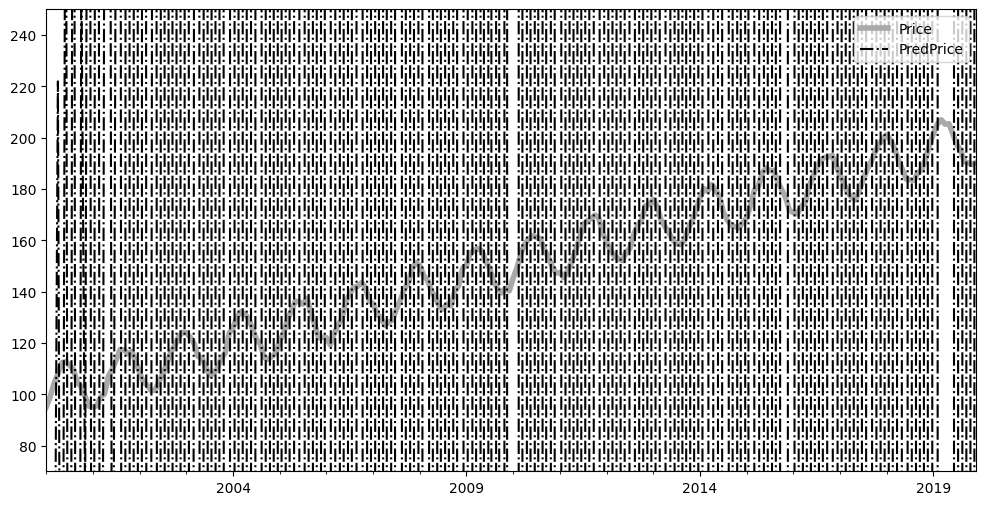

In [36]:
plt.ylim(70, 250)
dataset['Price'].plot(figsize=(12, 6), color='darkgray', linestyle='-', lw=4, legend='Price')
dataset['PredPrice'].plot(figsize=(12, 6), color='black', linestyle='-.', legend='PredPrice')

In [38]:
extended_dataset = pd.DataFrame(index=sm.tsa.datetools.dates_from_range('2020m1', length=48))
# extended_dataset = dataset.append(extended_dataset)
extended_dataset = pd.concat([dataset, extended_dataset])
extended_dataset

,Price,PredPrice
2000-01-31,95.021113,0.000000
2000-02-29,98.912804,0.756376
2000-03-31,104.269265,-40.959545
2000-04-30,107.882968,221.900960
2000-05-31,112.274693,-184.937680
...,...,...
2023-08-31,NaN,NaN
2023-09-30,NaN,NaN
2023-10-31,NaN,NaN
2023-11-30,NaN,NaN


In [39]:
extended_dataset['PredPrice'] = res_ar.predict(extended_dataset.index[0], extended_dataset.index[-1])
extended_dataset

,Price,PredPrice
2000-01-31,95.021113,0.000000e+00
2000-02-29,98.912804,7.563755e-01
2000-03-31,104.269265,-4.095954e+01
2000-04-30,107.882968,2.219010e+02
2000-05-31,112.274693,-1.849377e+02
...,...,...
2023-08-31,NaN,5.424161e+06
2023-09-30,NaN,-5.549131e+06
2023-10-31,NaN,6.455742e+06
2023-11-30,NaN,-4.747263e+06


<Axes: >

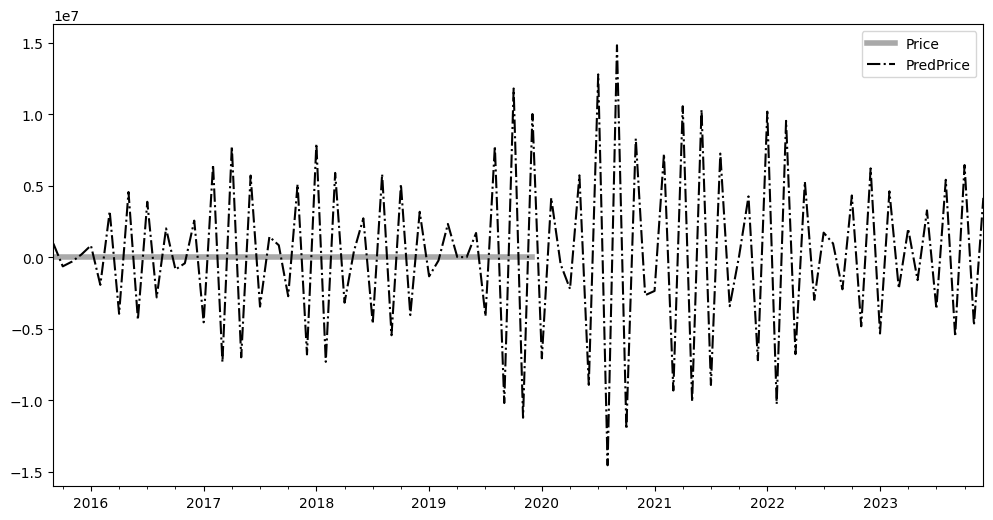

In [40]:
extended_dataset['Price'].iloc[-100:].plot(figsize=(12, 6), color='darkgray', linestyle='-', lw=4, legend='Price')
extended_dataset['PredPrice'].iloc[-100:].plot(figsize=(12, 6), color='black', linestyle='-.', legend='PredPrice')